Peut-on déterminer la meilleure équipe avec les statistiques individuelles ?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

attackers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_attackers.csv');
attackers.rename(columns={"Faults": "FaultsSpike"}, inplace=True)
attackers.rename(columns={"Total attempts": "Total_attempts_spike"}, inplace=True)
attackers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)
attackers["Success"] = attackers["Spikes"] / attackers["Total_attempts_spike"]

attackers.head(5)

,Name,Team,Spikes,FaultsSpike,Shots,Total_attempts_spike,Success %,Success
0,Bruno Lima,ARG,177,50,98,325,54.46,0.544615
1,Amir Ghafour,IRI,214,59,120,393,54.45,0.544529
2,Ricardo Lucarelli Souza,BRA,173,54,91,318,54.40,0.544025
3,Sharone Vernon-Evans,CAN,130,32,82,244,53.28,0.532787
4,Yuki Ishikawa,JPN,170,40,112,322,52.80,0.527950


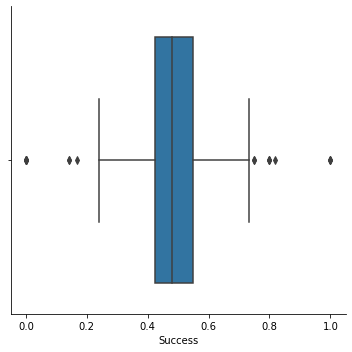

In [5]:
sb.catplot(x='Success', data=attackers, kind='box')

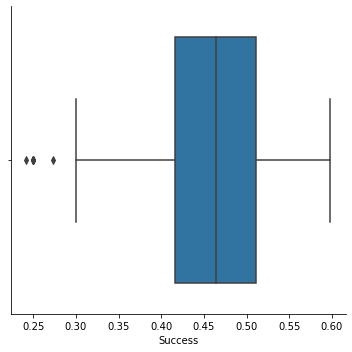

In [6]:
# Beaucoup de valeurs abérantes à cause de ceux qui ne joue pas beaucoup donc on les enlève
sb.catplot(x='Success', data=attackers.query("Success < 0.6 & Success > 0.2"), kind='box')

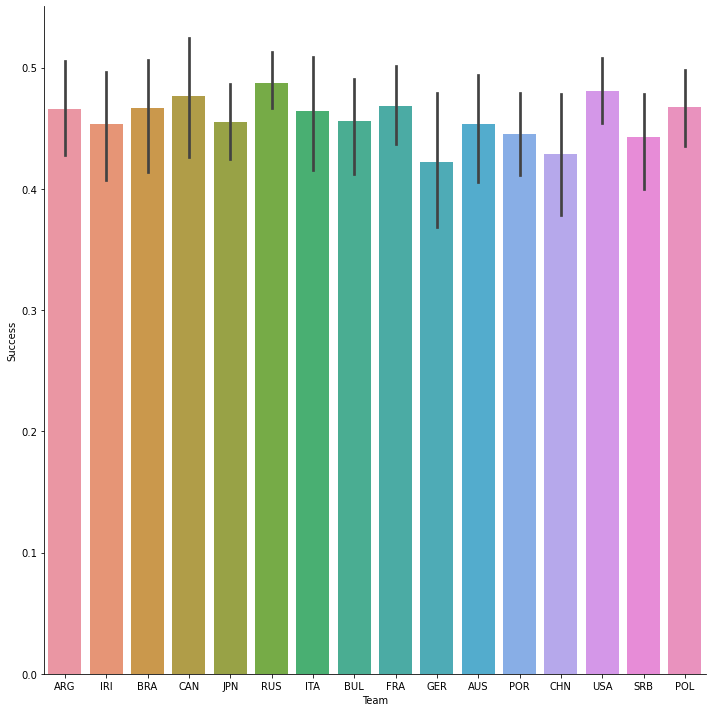

In [7]:
sb.catplot(x="Team", y="Success", data= attackers.query("Success < 0.6 & Success > 0.2"), kind="bar", height=10)

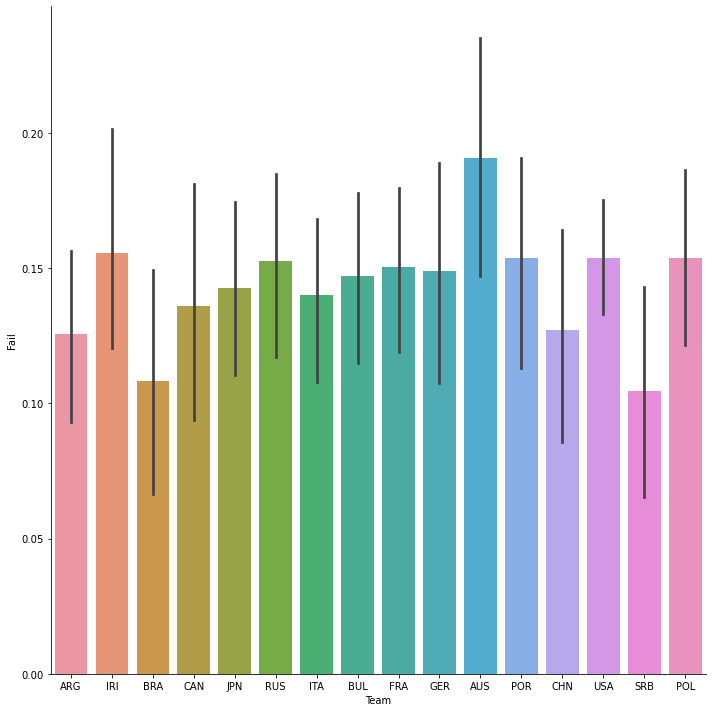

In [8]:
# On peut ce dire que l'équipe qui met le plus de points à l'attaque est celle qui doit gagner
# Mais il faut regarder les fautes directes aussi
attackers["Fail"] = attackers["FaultsSpike"] / attackers["Total_attempts_spike"]
sb.catplot(x="Team", y="Fail", data= attackers.query("Fail < 0.35"), kind="bar", height=10)

In [9]:
# b) Pareil avec le Service
servers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_servers.csv');
servers.rename(columns={"Faults": "FaultsServe"}, inplace=True)
servers.rename(columns={"Total attempts": "Total_attempts_serve"}, inplace=True)
servers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

servers.head(5)

,Name,Team,Aces,FaultsServe,Hits,Total_attempts_serve,Average per set
0,Egor Kliuka,RUS,28,37,107,172,0.41
1,Yuji Nishida,JPN,23,41,124,188,0.39
2,Ricardo Lucarelli Souza,BRA,23,33,175,231,0.30
3,Arshdeep Dosanjh,AUS,17,29,130,176,0.30
4,Simone Giannelli,ITA,16,21,110,147,0.29


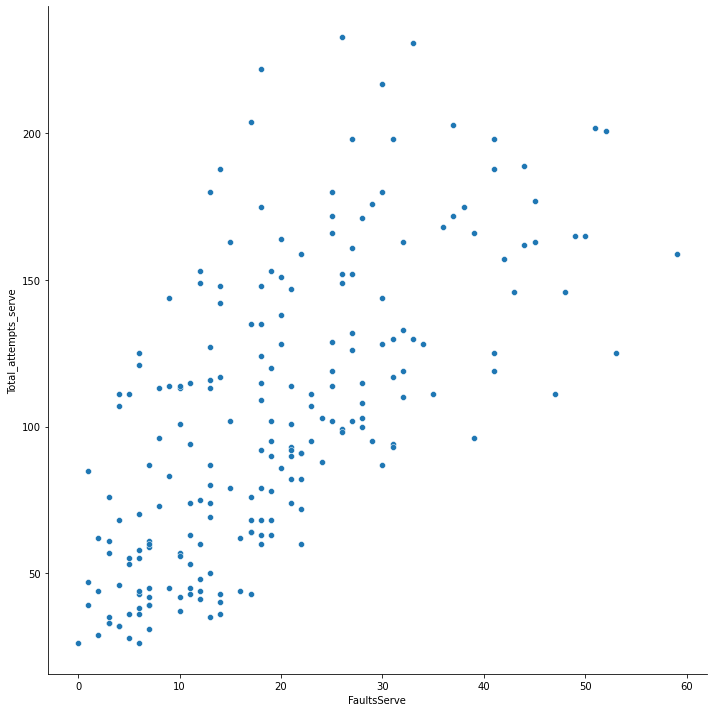

In [10]:
servers["Success"] = servers["Aces"] / servers["Total_attempts_serve"]
servers["Fail"] = servers["FaultsServe"] / servers["Total_attempts_serve"]

# Beaucoup de fautes de services
sb.relplot(x="FaultsServe", y="Total_attempts_serve", data=servers.query("Total_attempts_serve > 25"), height=10)

count    252.000000
mean       0.193530
std        0.236051
min       -1.140351
25%        0.073002
50%        0.204141
75%        0.322727
max        0.931373
Name: Result, dtype: float64

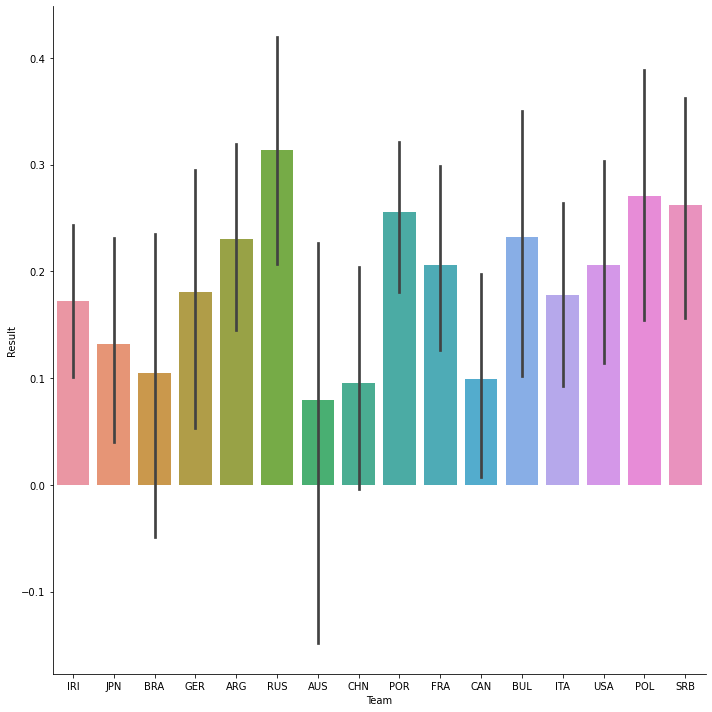

In [11]:
scores = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_scores.csv');
scores.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)
scores["Point_all"] = attackers["Success"] + servers["Success"]
scores["Fault_all"] = attackers["Fail"] + servers["Fail"]
scores["Result"] = scores["Point_all"] - scores["Fault_all"]
sb.catplot(x="Team", y="Result", data= scores, kind="bar", height=10)
scores["Result"].describe()

In [17]:
scores.query("Point_all > 0.2 & Point_all < 0.8 & ").describe()

,Attacks,Blocks,Serves,Total,Point_all,Fault_all,Result
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,49.858974,8.713675,4.991453,63.564103,0.534501,0.346317,0.188183
std,47.202711,7.532424,4.869094,54.799734,0.102047,0.143272,0.183801
min,0.000000,0.000000,0.000000,1.000000,0.212088,0.036036,-0.648148
25%,9.250000,3.000000,1.000000,17.250000,0.470458,0.250000,0.082389
50%,37.500000,7.000000,4.000000,48.000000,0.527275,0.332455,0.203801
75%,73.000000,13.000000,8.000000,95.000000,0.607291,0.438038,0.303858
max,214.000000,33.000000,28.000000,249.000000,0.773602,1.111111,0.629283
